In [3]:
from src.ALMApy import get_k2_vs_radius, change_param, run_alma, read_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from scipy.optimize import curve_fit


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

In [4]:
G = 6.67e-11

# Dimensions
R_jupiter = 69.9e6
m_neptune = 1.024e26
R_neptune = 24.6e6
rho_neptune = m_neptune/(4*np.pi/3*R_neptune**3)

# Material properties
rho_air = 1.293
rigidity_air = 1e-7
viscosity_air = 3e-5
rigidity_earth = 1e11
viscosity_earth = 1e21


In [5]:
complex_LNs = True

if complex_LNs:
    change_param("ln_output_type", "Complex")
change_param("time_points_minus_one", 100)
run_alma([R_jupiter, R_neptune], [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth], ["newton", "maxwell"])

if complex_LNs:
    periods, k2, k2_img = read_output(complex=True)
    periods = np.array(periods)
    k2 = np.array(k2)
    k2_img = np.array(k2_img)
else:
    periods, k2 = read_output(complex=False)


if complex_LNs:
    change_param("ln_output_type", "Real")

Running ALMA3...
Done running!


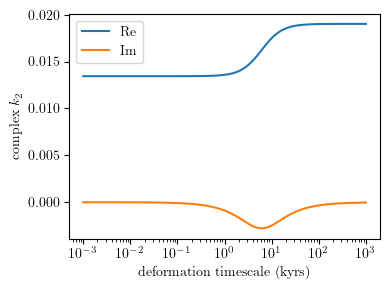

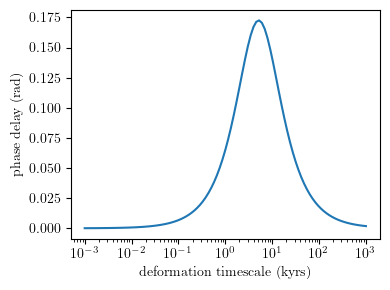

In [8]:
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(periods, k2, label="Re")
ax.plot(periods, k2_img, label="Im")
ax.set_xscale("log")
ax.set_xlabel("deformation timescale (kyrs)")
ax.set_ylabel("complex $k_2$")
ax.legend()
fig.tight_layout()


fig, ax = plt.subplots(figsize=(4,3))
ax.plot(periods, np.arctan(-k2_img/k2))
ax.set_xscale("log")
ax.set_xlabel("deformation timescale (kyrs)")
ax.set_ylabel("phase delay (rad)")
fig.tight_layout()
plt.show()
